In [12]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade
import fov
import pickle
import matplotlib
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.path
import matplotlib.patches 
import numpy as np
from scipy import interpolate
import plottingfunctions
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
def threeplot(tec_df, rad_df, sensitivity, plot_v=False, plot_ground=False, ylim=2700, savefig=True):
    fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(8, 8))
    #plotting TEC data only
    path, interp = plottingfunctions.get_outline(radar, beam)
    tec_df['contained'] = path.contains_points(np.vstack((tec_df.glon, tec_df.gdlat)).T) 
    part = tec_df.where(tec_df['contained'] == 1).dropna()
    part['nrange'] = 45*interp(part.glon, part.gdlat)  
    a1 = axs[0].scatter(part.datetime, part.nrange, c=part['30min_detrend'], vmin=-1 * sensitivity, vmax=sensitivity, marker='s', alpha=1, s=1, cmap='plasma') 
    cbar = fig.colorbar(a1, ax=axs[0]) 
    cbar.set_alpha(1)
    cbar.set_label('dTEC, TECU')

    #for plotting radar data
    rad_df = rad_df.where(rad_df.bmnum == beam).dropna()
    beam_num = int(rad_df.bmnum.unique()[0])
    rad_df.slist = rad_df.slist * 45

    #this next line will use ground range estimation from Bristow et al. 1994, if ground is selected
    if plot_ground:
        Re = 6371#km radius of earth
        h = 250#km altitude of peak density
        rad_df.slist =Re * np.arcsin((((rad_df.slist ** 2) / 4) - (h**2)) ** 0.5  / Re)


    if plot_v:
        rad = axs[1].scatter(rad_df.time, rad_df.slist, c = rad_df.v, vmin = -500, vmax=500, cmap='RdBu', marker = 's', s=4)
        cbar = fig.colorbar(rad, ax=axs[1]) 
        axs[1].set_facecolor('lightgray')
        cbar.set_label('SD Velocity, m/s')       
    else:
        rad = axs[1].scatter(rad_df.time, rad_df.slist, c = rad_df.p_l, vmin = 0, vmax=40, cmap='jet', marker = 's', s=4)
        cbar = fig.colorbar(rad, ax=axs[1]) 
        cbar.set_label('SD Power, dB')

        
    #plotting both at once
    axs[2].scatter(part.datetime, part.nrange, c=part['30min_detrend'], vmin=-1 * sensitivity, vmax=sensitivity, marker='s', alpha=1, s=2, cmap='plasma')
    if plot_v:
        axs[2].scatter(rad_df.time, rad_df.slist, c = rad_df.v, vmin = -500, vmax=500, cmap='RdBu', marker = 's', s=4, alpha=0.6)
    else:    
        axs[2].scatter(rad_df.time, rad_df.slist, c = rad_df.p_l, vmin = 0, vmax=40, cmap='jet', marker = 's', s=4, alpha=0.6)

    #format the figure
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7) 
    formatter = mdates.ConciseDateFormatter(locator)
    fig.suptitle(radar +' beam #' + str(beam),  fontsize="x-large")
    for ax in axs: 
        ax.xaxis.set_major_locator(locator) 
        ax.xaxis.set_major_formatter(formatter) 
        ax.set_xlim([start, end]) 
        ax.set_ylim([0, ylim]) 
        ax.set_ylabel('Range, km')
    if savefig:
        fig.savefig(radar +' beam #' + str(beam) + ".pdf", bbox_inches='tight')
        fig.savefig(radar +' beam #' + str(beam) + ".png", bbox_inches='tight')

In [2]:
start = dt.datetime(2017, 9 ,7, 23)
end = start + dt.timedelta(hours=4)
filename = 'los_' + str(start.year) + str(start.month).zfill(2) + str(start.day).zfill(2) + '.pkl'
df = pd.read_pickle(filename)
print('dataframe is ' + str(df.size) + ' long and spans from ' + str(df.datetime.min()) + ' to ' + str(df.datetime.max()))

dataframe is 113887320 long and spans from 2017-09-07 22:30:30 to 2017-09-08 03:29:30


In [16]:
radar = 'cvw'
rad_df = pd.read_pickle('radar_'+ str(start.year) + '-' + str(start.month).zfill(2) + '-' + str(start.day).zfill(2) + radar +'.pkl')
for beam in rad_df.bmnum.unique():
    plottingfunctions.threeplot(radar, beam, rad_df, df, start, end, sensitivity=3, plot_v=True, plots='sd', savefig=False)

TypeError: threeplot() got an unexpected keyword argument 'savefig'

_HdwInfo(stid=204, abbrev='fhw', geographic=_Coord(lat=38.859, lon=-99.389, alt=675.1), boresight=-25.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=0.0, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=22)


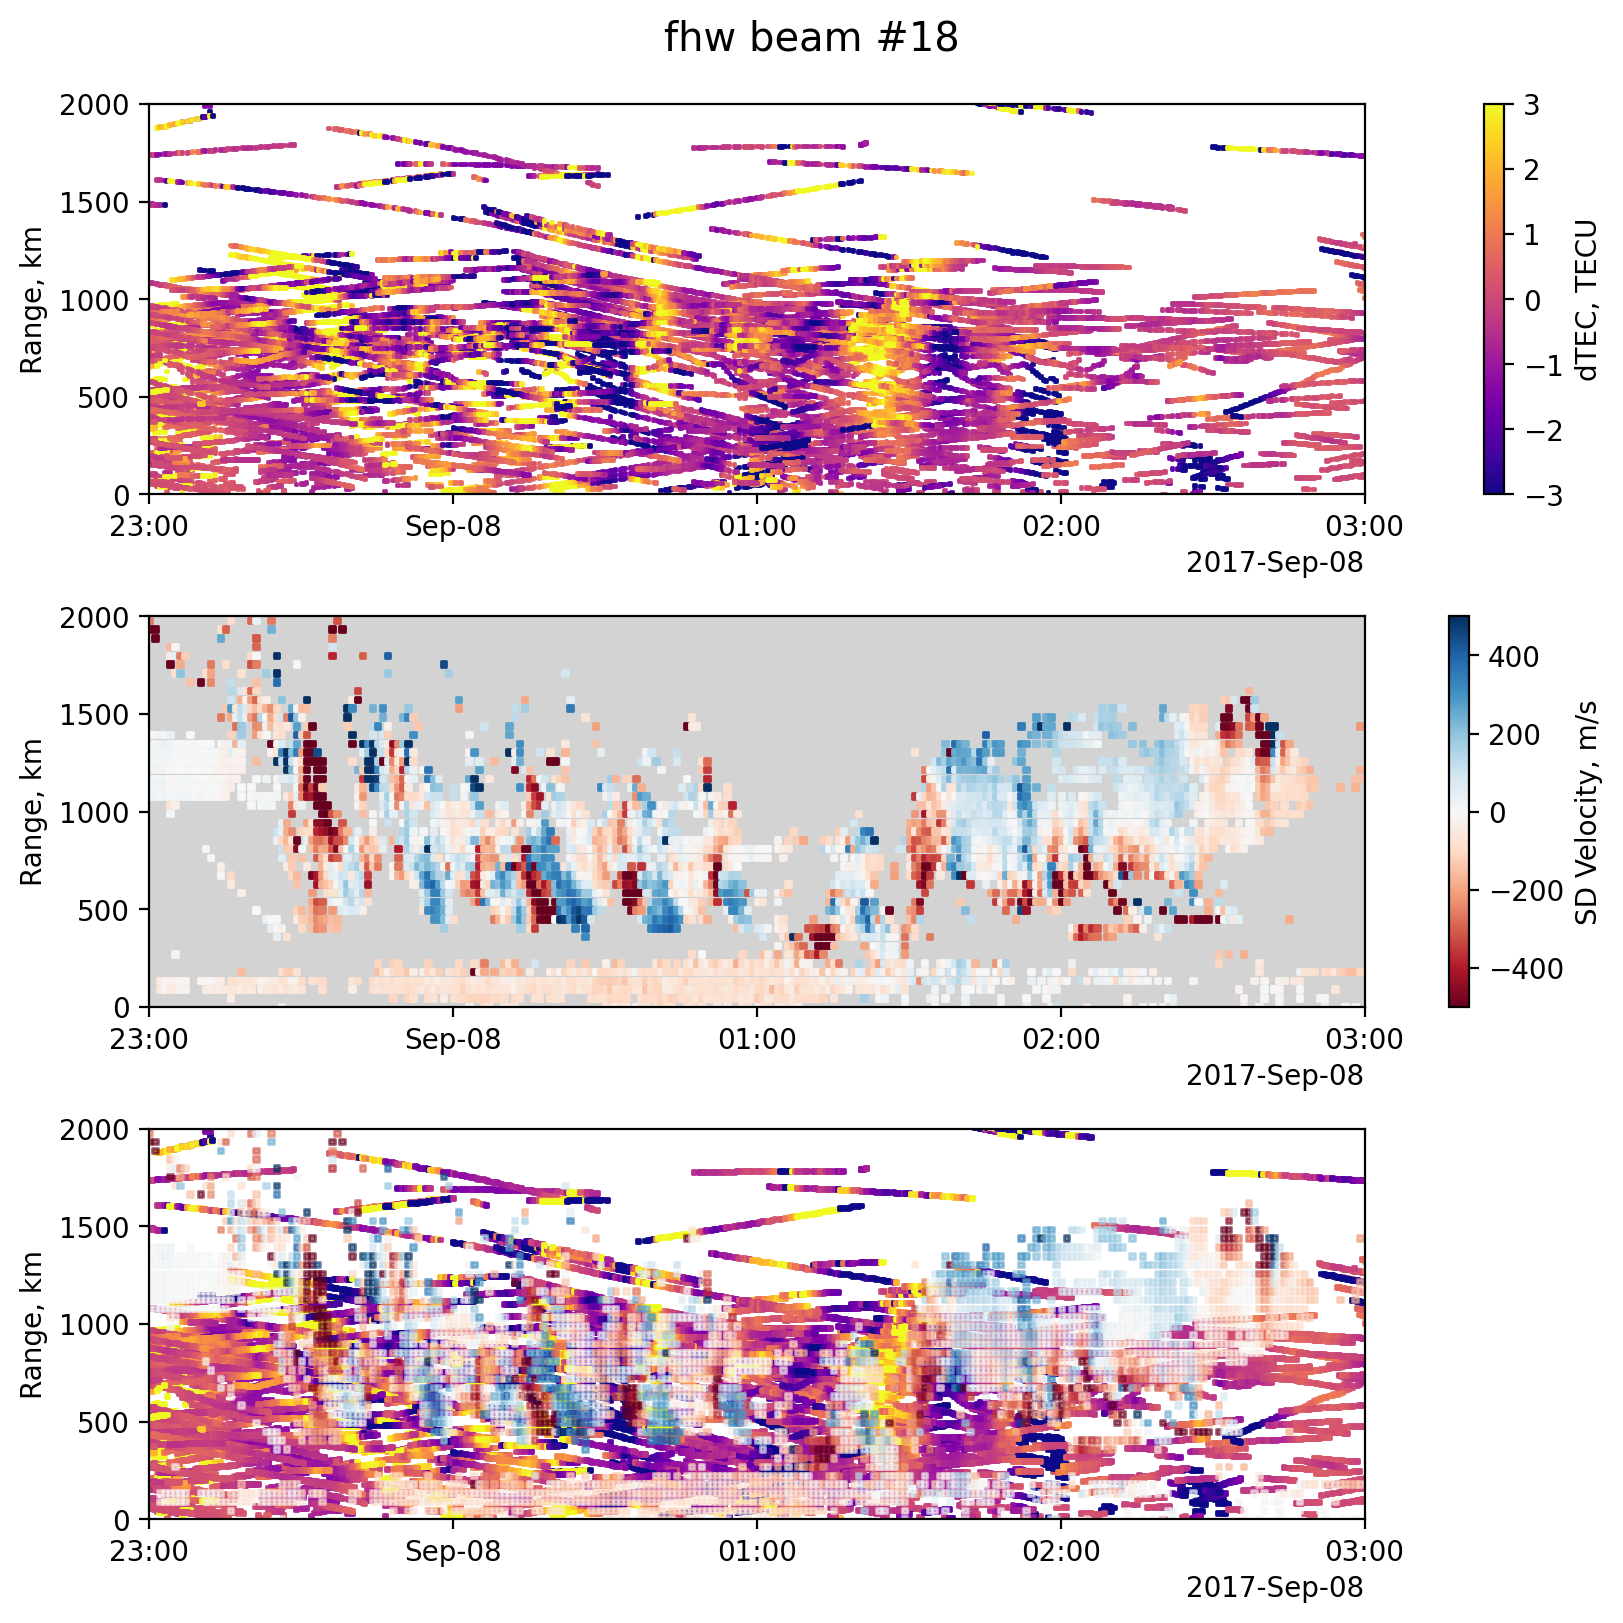

In [14]:
radar = 'fhw'
beam = 18

sensitivity = 3
rad_df = pd.read_pickle('radar_'+ str(start.year) + '-' + str(start.month).zfill(2) + '-' + str(start.day).zfill(2) + radar +'.pkl')
threeplot(df, rad_df, sensitivity, plot_v=True, savefig=True, ylim=2000)

chose beam 18 valid beams are: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]
_HdwInfo(stid=207, abbrev='cve', geographic=_Coord(lat=43.271, lon=-120.358, alt=1313.535), boresight=54.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=10.0, tdiff=-0.398, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=24)


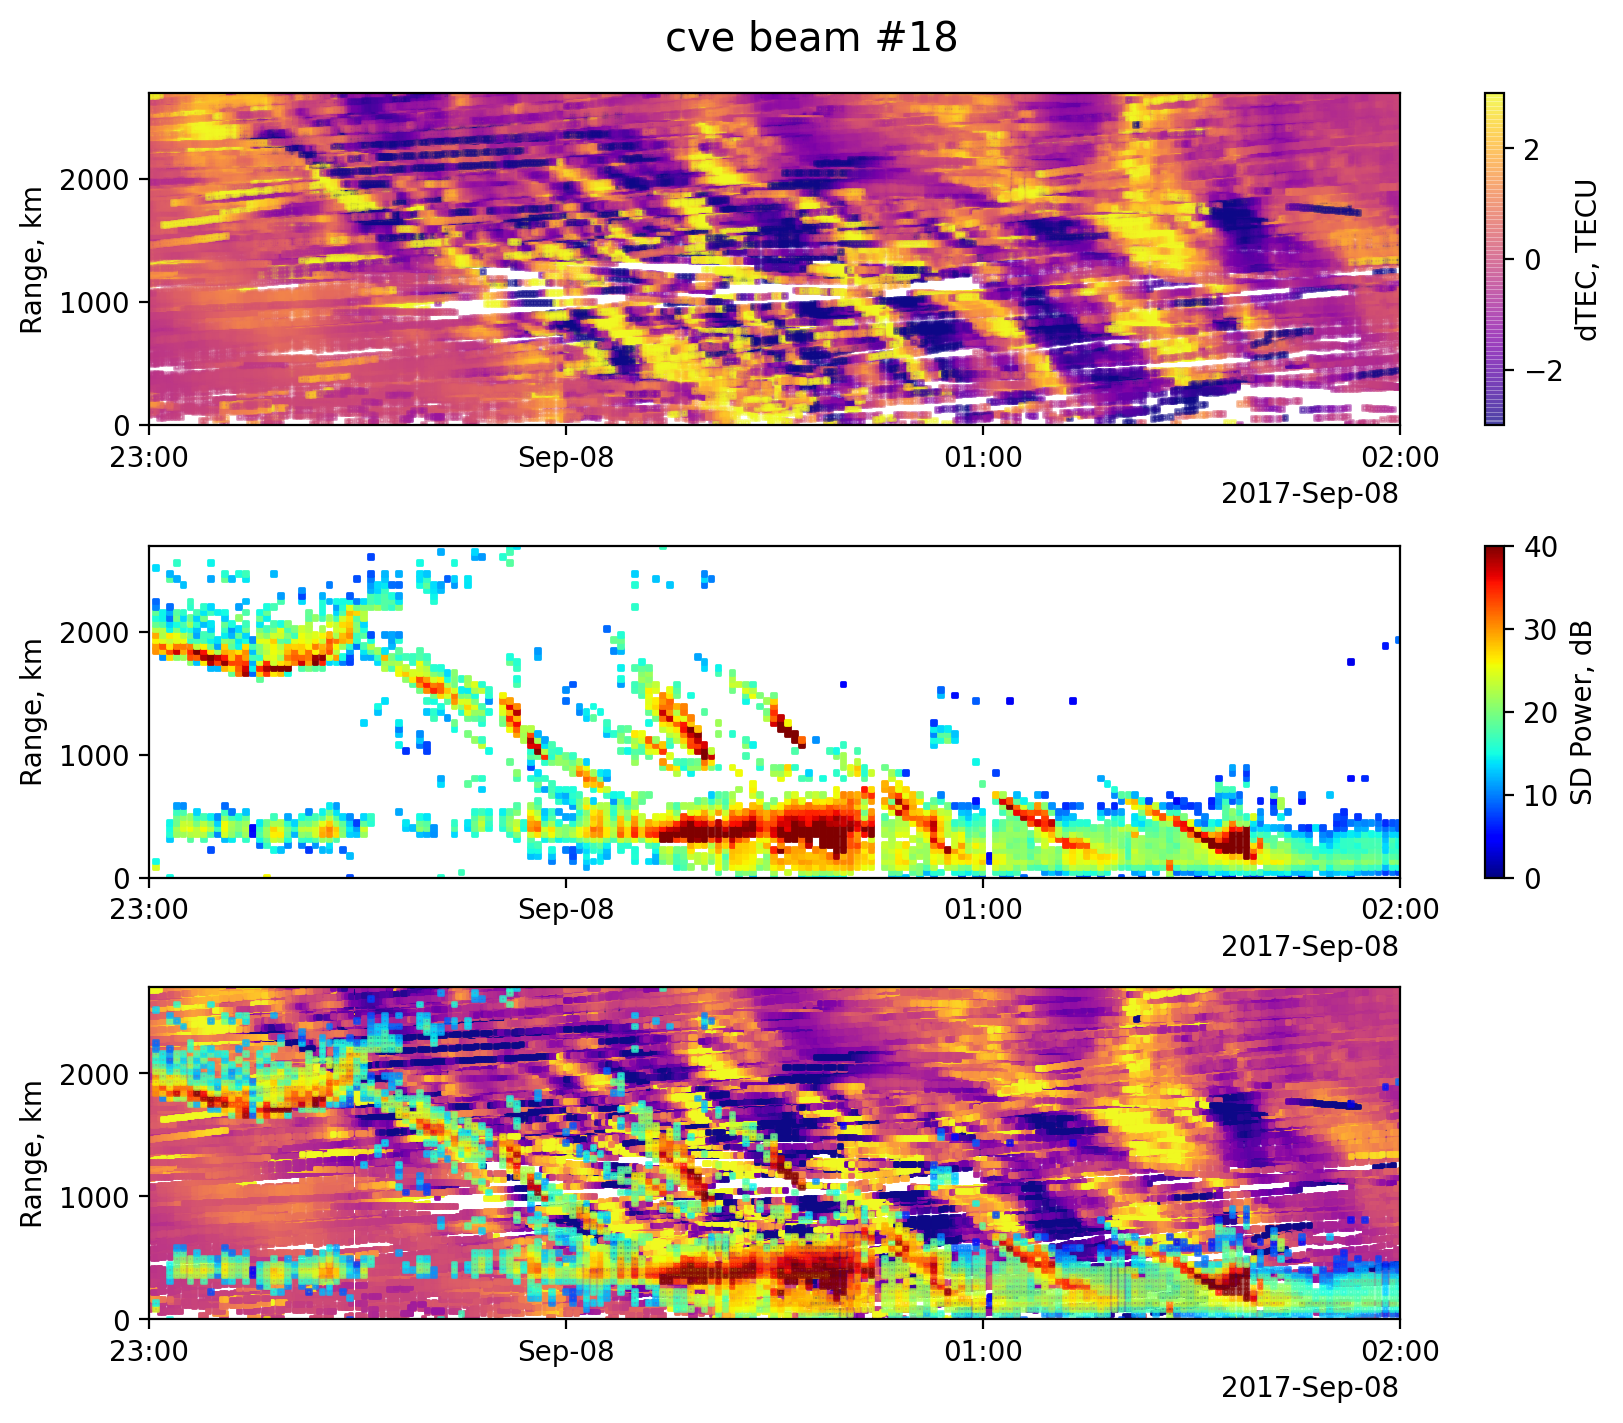

In [3]:
#change these
radar = 'cve'
beam = 18

end = start + dt.timedelta(hours=3)


rad_df = pd.read_pickle('radar_'+ str(start.year) + '-' + str(start.month).zfill(2) + '-' + str(start.day).zfill(2) + radar +'.pkl')
print('chose beam ' + str(beam) + ' valid beams are: ' + str(rad_df.bmnum.unique()))
plottingfunctions.threeplot(radar, beam, rad_df, df, start, end, sensitivity=3, plots='all', plot_v=False)
#plottingfunctions.threeplot(radar, beam, rad_df, df, start, end, sensitivity=3, plots='sd', plot_ground=False, plot_v=False)
#for beam in rad_df.bmnum.unique():
#    plottingfunctions.threeplot(radar, beam, rad_df, df, start, end, plots='sd', plot_v=True)



_HdwInfo(stid=33, abbrev='bks', geographic=_Coord(lat=37.1, lon=-77.95, alt=125.0), boresight=-40.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=-0.3364, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-58.9, z=-2.7), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=24)


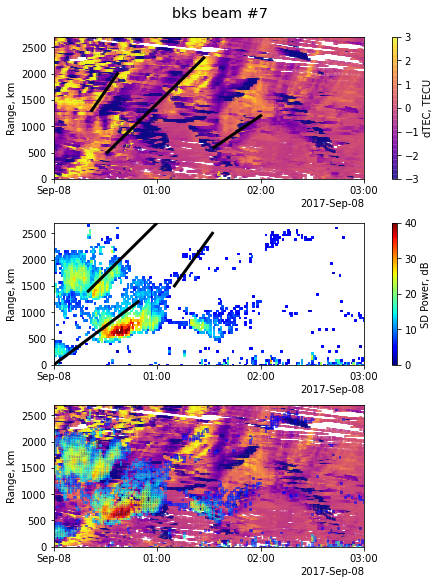

In [5]:


def annotate(radar, beam, rad_df, tec_df, start, end, sensitivity=1):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(6, 8))
    #plotting TEC data only
    path, interp = plottingfunctions.get_outline(radar, beam)
    tec_df['contained'] = path.contains_points(np.vstack((tec_df.glon, tec_df.gdlat)).T) 
    part = tec_df.where(tec_df['contained'] == 1).dropna()
    part['nrange'] = 45*interp(part.glon, part.gdlat)  
    a1 = axs[0].scatter(part.datetime, part.nrange, c=part['30min_detrend'], vmin=-1 * sensitivity, vmax=sensitivity, marker='s', alpha=.5, s=3, cmap='plasma') 
    cbar = fig.colorbar(a1, ax=axs[0]) 
    cbar.set_alpha(1)
    cbar.set_label('dTEC, TECU') 

    #for plotting radar data
    rad_df = rad_df.where(rad_df.bmnum == beam).dropna()
    beam_num = int(rad_df.bmnum.unique()[0])
    rad_df.slist = rad_df.slist * 45
    rad = axs[1].scatter(rad_df.time, rad_df.slist, c = rad_df.p_l, vmin = 0, vmax=40, cmap='jet', marker = 's', s=3)
    cbar = fig.colorbar(rad, ax=axs[1]) 
    cbar.set_label('SD Power, dB')

    #plotting both at once
    axs[2].scatter(part.datetime, part.nrange, c=part['30min_detrend'], vmin=-1 * sensitivity, vmax=sensitivity, marker='s', alpha=.5, s=2, cmap='plasma')
    axs[2].scatter(rad_df.time, rad_df.slist, c = rad_df.p_l, vmin = 0, vmax=40, cmap='jet', marker = 's', s=3, alpha=.5)

    #format the figure
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7) 
    formatter = mdates.ConciseDateFormatter(locator)
    fig.suptitle(radar +' beam #' + str(beam),  fontsize="x-large")

    for ax in axs: 
        ax.xaxis.set_major_locator(locator) 
        ax.xaxis.set_major_formatter(formatter) 
        ax.set_xlim([start, end]) 
        ax.set_ylim([0, 2700]) 
        ax.set_ylabel('Range, km')
    #annotations on TEC
    x1, y1 = [dt.datetime(2017, 9, 8), dt.datetime(2017, 9, 8, 0, 49)], [0,  1200]
    x2, y2 = [dt.datetime(2017, 9, 8, 0, 20), dt.datetime(2017, 9, 8, 1)], [1400,  2700]
    x3, y3 = [dt.datetime(2017, 9, 8, 1, 10), dt.datetime(2017, 9, 8, 1, 32)], [1500, 2500]
    axs[1].plot(x1, y1, c='k', linewidth = 3)
    axs[1].plot(x2, y2, c='k', linewidth = 3)
    axs[1].plot(x3, y3, c='k', linewidth = 3)
    #annotations on SD
    x1, y1 = [dt.datetime(2017, 9, 8, 0, 22), dt.datetime(2017, 9, 8, 0, 37)], [1300, 2000]
    x2, y2 = [dt.datetime(2017, 9, 8, 0, 31), dt.datetime(2017, 9, 8, 1, 27)], [500,  2300]
    x3, y3 = [dt.datetime(2017, 9, 8, 1, 33), dt.datetime(2017, 9, 8, 2)], [600,  1200]
    axs[0].plot(x1, y1, c='k', linewidth = 3)
    axs[0].plot(x2, y2, c='k', linewidth = 3)
    axs[0].plot(x3, y3, c='k', linewidth = 3)

radar = 'bks'
beam = 7
start = dt.datetime(2017, 9, 7)
rad_df = pd.read_pickle('radar_'+ str(start.year) + '-' + str(start.month).zfill(2) + '-' + str(start.day).zfill(2) + radar +'.pkl')
start = start + dt.timedelta(days=1)
annotate(radar, beam, rad_df, df, start, end, sensitivity=3)

In [6]:
def south_plot(time, df):
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import datetime as dt
    fig = plt.figure(figsize = (12, 10))
    part = df[df['datetime'] == time]
    #if len(part) < 10000:
    #    part = df[df['datetime'] == time + dt.timedelta(seconds = 30)]
    ax = fig.add_subplot(1, 1, 1, projection="fovcarto",coords="geo", plot_date=time,map_projection=ccrs.Orthographic(central_latitude=-50, central_longitude=150))

    ax.set_extent([120, 180, -70, -40], crs=ccrs.PlateCarree())
    date_time = date_time = time.strftime("%m/%d/%Y, %H:%M:%S")
    ax.set_title(date_time + ' UT', size=20)
    mesh = ax.scatter(part.glon, part.gdlat, c=part['tec'], transform=ccrs.PlateCarree(), vmin=0, vmax=30, cmap='jet', s=25, zorder=3)
    pos = ax.get_position()
    ax.grid_on()
    cbar = plt.colorbar(mesh, fraction=0.04, pad=0.04)
    cbar.set_label('TECu')
    ax.coastlines()
    ax.add_dn_terminator()

    return ax

C:\Users\Ian\anaconda3\envs\env\lib\site-packages\cartopy\mpl\gridliner.py: 307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
C:\Users\Ian\anaconda3\envs\env\lib\site-packages\cartopy\mpl\gridliner.py: 343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.


_HdwInfo(stid=33, abbrev='bks', geographic=_Coord(lat=37.1, lon=-77.95, alt=125.0), boresight=-40.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=-0.3364, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-58.9, z=-2.7), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=24)


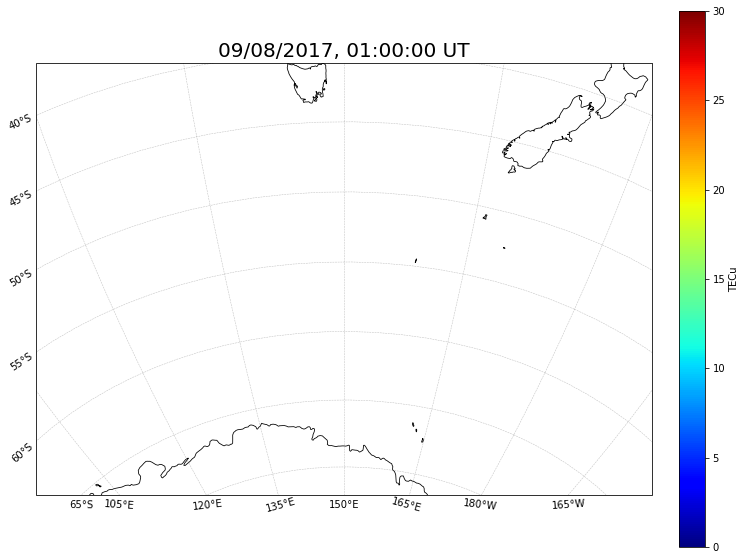

In [7]:
time = start + dt.timedelta(hours=1)
ax = south_plot(time, df)
beam = 1
path, interp = plottingfunctions.get_outline(radar, beam)
patch = matplotlib.patches.PathPatch(path, fill=False, edgecolor='k', lw=2, transform=ccrs.PlateCarree())
ax.add_patch(patch)
#part = df[df['datetime'] == start]
#df['contained'] = path.contains_points(np.vstack((df.glon, df.gdlat)).T)

_HdwInfo(stid=204, abbrev='fhw', geographic=_Coord(lat=38.859, lon=-99.389, alt=675.1), boresight=-25.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=0.0, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=22)


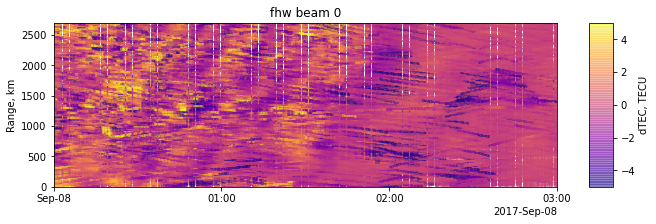

_HdwInfo(stid=204, abbrev='fhw', geographic=_Coord(lat=38.859, lon=-99.389, alt=675.1), boresight=-25.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=0.0, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=22)


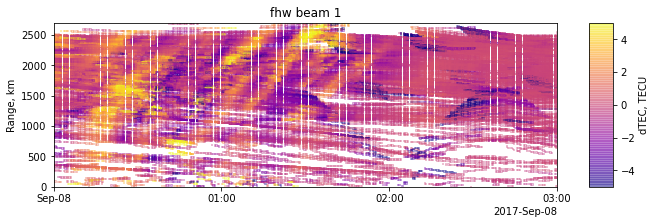

_HdwInfo(stid=204, abbrev='fhw', geographic=_Coord(lat=38.859, lon=-99.389, alt=675.1), boresight=-25.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=0.0, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=22)


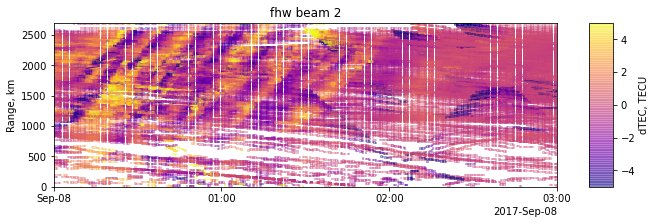

_HdwInfo(stid=204, abbrev='fhw', geographic=_Coord(lat=38.859, lon=-99.389, alt=675.1), boresight=-25.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=0.0, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=22)


KeyboardInterrupt: 

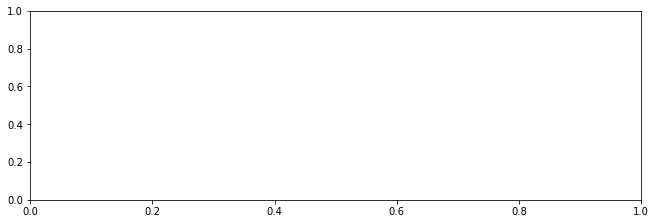

In [8]:
def tecplot(radar, beam, tec_df, start, end):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    plt.close()
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 3))
    #plotting TEC data only
    path, interp = plottingfunctions.get_outline(radar, beam)
    tec_df['contained'] = path.contains_points(np.vstack((tec_df.glon, tec_df.gdlat)).T) 
    part = tec_df.where(tec_df['contained'] == 1).dropna()
    part['nrange'] = 45*interp(part.glon, part.gdlat)  
    a1 = ax.scatter(part.datetime, part.nrange, c=part['30min_detrend'], vmin=-5, vmax=5, marker='s', alpha=.3, s=2, cmap='plasma') 
    cbar = fig.colorbar(a1, ax=ax) 
    cbar.set_alpha(1)
    cbar.set_label('dTEC, TECU') 
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7) 
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator) 
    ax.xaxis.set_major_formatter(formatter) 
    ax.set_xlim([start, end]) 
    ax.set_ylim([0, 2700]) 
    ax.set_ylabel('Range, km')
    ax.set_title(radar + ' beam ' + str(beam))
    plt.show()


radars = ['fhw']
for radar_code in radars:
    for beamnum in range(21):
        tecplot(radar_code, beamnum, df, start, end)

_HdwInfo(stid=207, abbrev='cve', geographic=_Coord(lat=43.271, lon=-120.358, alt=1313.535), boresight=54.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=10.0, tdiff=-0.398, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=24)


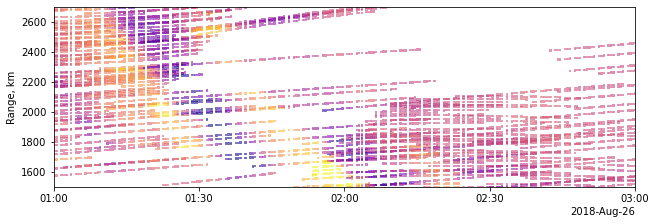

In [ ]:
def threeplot(radar, beam, rad_df, tec_df, start, end):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 3))
    #plotting TEC data only
    path, interp = plottingfunctions.get_outline(radar, beam)
    tec_df['contained'] = path.contains_points(np.vstack((tec_df.glon, tec_df.gdlat)).T) 
    part = tec_df.where(tec_df['contained'] == 1).dropna()
    part['nrange'] = 45*interp(part.glon, part.gdlat)  


    #for plotting radar data
    beam_num = int(rad_df.bmnum.unique()[0])
    rad_df.slist = rad_df.slist * 45


    #plotting both at once
    axs.scatter(part.datetime, part.nrange, c=part['30min_detrend'], vmin=-5, vmax=5, marker='s', alpha=.5, s=2, cmap='plasma')
    axs.scatter(rad_df.time, rad_df.slist, c = rad_df.p_l, vmin = 0, vmax=40, cmap='jet', marker = 's', s=3, alpha=.5)

    #format the figure
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7) 
    formatter = mdates.ConciseDateFormatter(locator)

    
    axs.xaxis.set_major_locator(locator) 
    axs.xaxis.set_major_formatter(formatter) 
    axs.set_xlim([start, end]) 
    axs.set_ylim([1500, 2700]) 
    axs.set_ylabel('Range, km')
start = dt.datetime(2018, 8, 26, 1)
end = dt.datetime(2018, 8, 26, 3)
rad_df = pd.read_pickle('radar_2018-08-26cve18.pkl')
threeplot('cve', 18, rad_df, df, start, end)

_HdwInfo(stid=207, abbrev='cve', geographic=_Coord(lat=43.271, lon=-120.358, alt=1313.535), boresight=54.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=10.0, tdiff=-0.398, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=24)
power p=nan
velocity p=nan


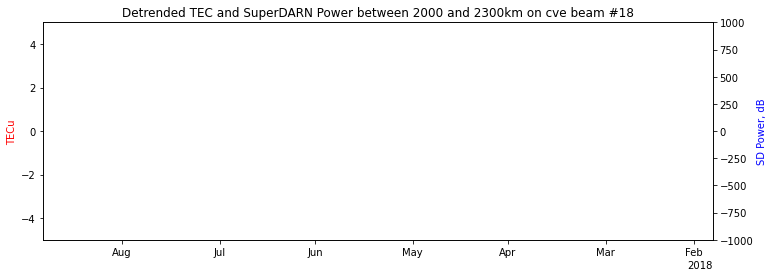

In [ ]:
def vel_ts(radar, beam, rad_df, tec_df, startrange, endrange, start, end):
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    import pandas as pd
    import numpy as np

    #getting just the TEC in desired beam, and adding range data
    path, interp = plottingfunctions.get_outline(radar, beam)
    tec_df['contained'] = path.contains_points(np.vstack((tec_df.glon, tec_df.gdlat)).T) 
    part = tec_df.where(tec_df['contained'] == 1).dropna()
    part['nrange'] = 45*interp(part.glon, part.gdlat)  
    part = part.where(part['datetime'] < end)
    part = part.where(part['datetime'] > start)
    part = part.where(startrange < part.nrange)
    part = part.where(part.nrange < endrange).dropna()

    #getting SD data only within certain times and ranges
    rad_df.slist = rad_df.slist * 45
    rad_df = rad_df.where(rad_df['time'] < end)
    rad_df = rad_df.where(rad_df['time'] > start)
    rad_df = rad_df.where(rad_df['slist'] < endrange)
    rad_df = rad_df.where(rad_df['slist'] > startrange).dropna()

    #plotting
    fig, ax = plt.subplots(figsize=(12, 4))

    #TEC
    ax.scatter(part.datetime, part['30min_detrend'], s=5, c='r')
    grouped = part.set_index('datetime').groupby(pd.Grouper(freq='min')).mean().dropna()
    ax.plot(grouped.index, grouped['30min_detrend'], c='r', linewidth=3)
    ax.set_ylim([-5, 5])

    #SuperDARN on same axes, labels on right
    twin1 = ax.twinx()
    twin1.scatter(rad_df.time, rad_df.v, c='b', s=25)
    rad_grouped = rad_df.set_index('time').groupby(pd.Grouper(freq='min')).mean().dropna()
    twin1.plot(rad_grouped.index, rad_grouped.v, c='b', linewidth=3)
    twin1.set_ylim([-1000, 1000])

    #plot formatting
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    plt.title('Detrended TEC and SuperDARN Power between ' + str(startrange) + ' and ' + str(endrange) +'km on ' + radar + ' beam #' + str(beam))
    ax.set_xlim([start, end])
    twin1.set_xlim([start, end])

    #correlation
    print('power p=' + str(grouped['30min_detrend'].corr(rad_grouped.p_l)))
    print('velocity p=' + str(grouped['30min_detrend'].corr(rad_grouped.v)))
    #ylabels
    ax.set_ylabel('TECu')
    twin1.set_ylabel('SD Power, dB')
    ax.yaxis.label.set_color('r')
    twin1.yaxis.label.set_color('b')
    plt.show()

radar = 'cve'
beam = 18
rad_df = pd.read_pickle('radar_2018-08-26cve18.pkl')
vel_ts(radar, beam, rad_df, df, 2000, 2300, dt.datetime(2018, 8, 26, 1), dt.datetime(2018, 1, 26, 3))

Text(0, 0.5, 'Slant Range, km')

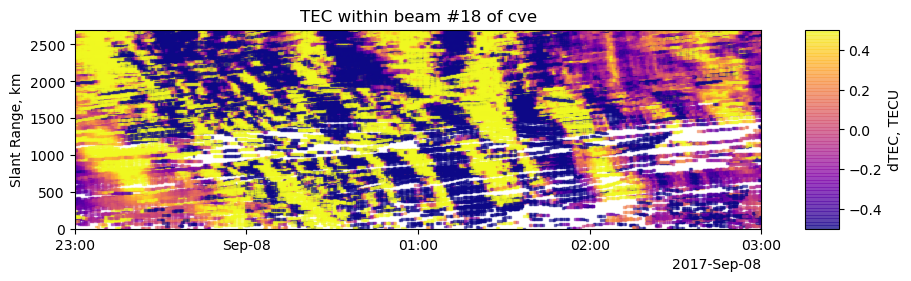

In [ ]:
part = df.where(df['contained'] == 1).dropna()

part['nrange'] = 45*interp(part.glon, part.gdlat)
fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 2.7))
a1 = pts = axs.scatter(part.datetime, part.nrange, c=part['30min_detrend'], vmin=-.5, vmax=.5, marker='s', alpha=.5, s=2, cmap='plasma')
cbar = fig.colorbar(a1)
cbar.set_label('dTEC, TECU')
matplotlib.rcParams['figure.dpi'] = 300
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
axs.xaxis.set_major_locator(locator)
axs.xaxis.set_major_formatter(formatter)
axs.set_xlim([start, end])
axs.set_ylim([0, 2700])
plt.title('TEC within beam #' + str(beam) + ' of ' + radar)
axs.set_ylabel("Slant Range, km")

 Radar: -99.389 38.859
_HdwInfo(stid=205, abbrev='fhe', geographic=_Coord(lat=38.859, lon=-99.389, alt=673.6), boresight=45.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=0.0, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=22)
_HdwInfo(stid=205, abbrev='fhe', geographic=_Coord(lat=38.859, lon=-99.389, alt=673.6), boresight=45.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=0.0, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=22)


NameError: name 'fhe' is not defined

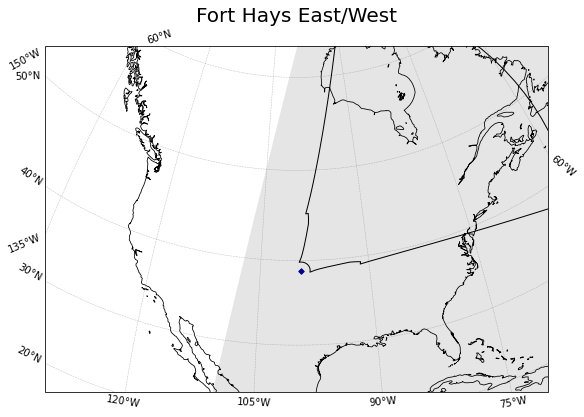

In [ ]:
time = dt.datetime(2017, 9, 8, 1,30, 30)
start = dt.datetime(2017, 9, 8, 1,30)
df = 
plottingfunctions.plot_still(time, df, 0, time)

dataframe is 51199016 long and spans from 2017-09-07 22:00:30 to 2017-09-07 23:59:30


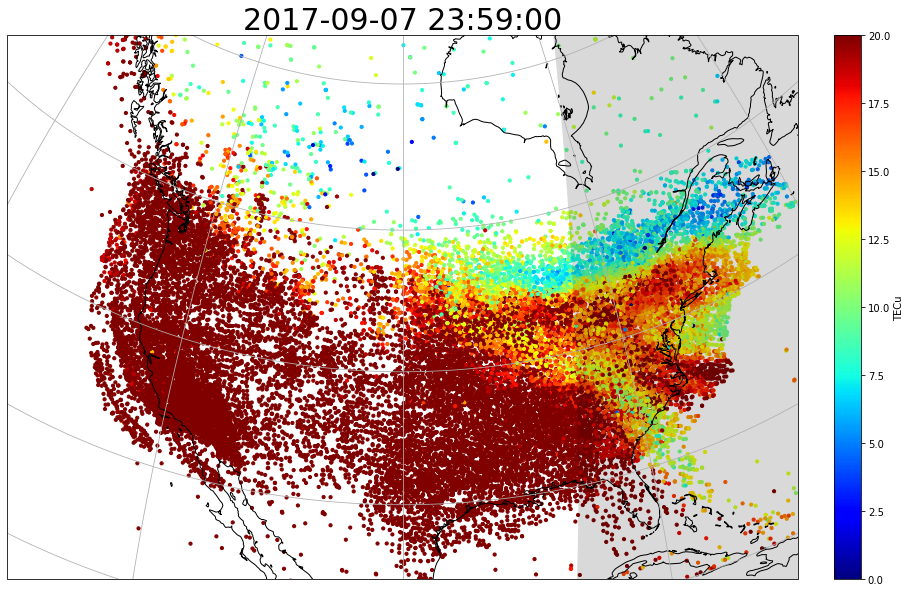

In [ ]:
start = dt.datetime(2017, 9, 7, 23, 59)
end = start + dt.timedelta(hours=4)
filename = 'los_' + str(start.year) + str(start.month).zfill(2) + str(start.day).zfill(2) + '.pkl'
df = pd.read_pickle(filename)
print('dataframe is ' + str(df.size) + ' long and spans from ' + str(df.datetime.min()) + ' to ' + str(df.datetime.max()))
tecmap = plt.figure(figsize=(16, 10))
ax = plt.axes(projection = ccrs.Orthographic(central_longitude=-100, central_latitude=60))
ax.coastlines(color='black', zorder=1)
ax.gridlines()
ax.set_extent([-130, -70, 20, 60])
ax.add_feature(Nightshade(start, alpha=0.15))
   
part = df[df['datetime'] == start]

        
ax.set_title(str(start), size=30)    
mesh = ax.scatter(part.glon, part.gdlat, c=part.tec, transform=ccrs.PlateCarree(), vmin=0, vmax=20, cmap='jet', s=10)
cbar = plt.colorbar(mesh, fraction=0.046, pad=0.04)
cbar.set_label('TECu')

plt.show()